<a href="https://colab.research.google.com/github/negicha/2023_ds/blob/main/AutoML_pycaret_diamond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
##PyCaret 回帰（初心者向けTutorial）
https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb

---
###[1]Diamondデータの準備、pycaretのインストール

Ver 3.1.0 (23/10/16)

In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 81.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 80.2 MB/s

In [ ]:
from pycaret.datasets import get_data
dataset = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [ ]:
#check the shape of data
dataset.shape

(6000, 8)

In [ ]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (5400, 8)
Unseen Data For Predictions: (600, 8)


In [ ]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'Price', session_id=123)

,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(5400, 8)"
4,Transformed data shape,"(5400, 29)"
5,Transformed train set shape,"(3779, 29)"
6,Transformed test set shape,"(1621, 29)"
7,Ordinal features,1
8,Numeric features,1
9,Categorical features,6


In [ ]:
#--一番良いモデルを選択-------------------
# デフォルトのMAEで比較
#----------------------------------------
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,707.5494,2263259.7973,1465.1384,0.9781,0.0751,0.0548,0.2610
et,Extra Trees Regressor,758.7793,2661557.6112,1584.1538,0.9743,0.0820,0.0608,1.4840
rf,Random Forest Regressor,760.1499,2944058.4839,1663.3278,0.9714,0.0815,0.0596,1.4590
lightgbm,Light Gradient Boosting Machine,752.6246,3056225.3710,1687.9572,0.9711,0.0773,0.0567,0.6300
gbr,Gradient Boosting Regressor,919.8439,3757700.7801,1899.5914,0.9634,0.1024,0.0770,0.3950
dt,Decision Tree Regressor,1011.9136,5382439.9624,2244.3755,0.9465,0.1082,0.0779,0.3080
ridge,Ridge Regression,2413.5698,14120482.9350,3726.1631,0.8621,0.6689,0.2875,0.4030
lasso,Lasso Regression,2412.1916,14246796.5754,3744.2300,0.8608,0.6767,0.2866,0.3240
llar,Lasso Least Angle Regression,2412.2092,14246792.3690,3744.2301,0.8608,0.6759,0.2866,0.1560
br,Bayesian Ridge,2415.8031,14270771.8397,3746.9951,0.8606,0.6696,0.2873,0.1550


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [ ]:
tuned_best = tune_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,624.5120,1056155.9773,1027.6945,0.9884,0.0800,0.0564
1,735.2781,2263892.6016,1504.6237,0.9826,0.0776,0.0576
2,752.1569,2240578.0764,1496.8561,0.9794,0.0814,0.0616
3,753.9960,1976649.7529,1405.9338,0.9782,0.0749,0.0563
4,722.0099,2973477.8519,1724.3775,0.9629,0.0809,0.0583
5,796.7848,3986947.4282,1996.7342,0.9660,0.0805,0.0582
6,725.6933,2367251.8558,1538.5876,0.9778,0.0745,0.0558
7,724.7008,1882817.3846,1372.1579,0.9762,0.0778,0.0586
8,729.6472,1868881.8635,1367.0705,0.9816,0.0746,0.0561


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
#--MLモデルの評価結果----------------
evaluate_model(tuned_best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

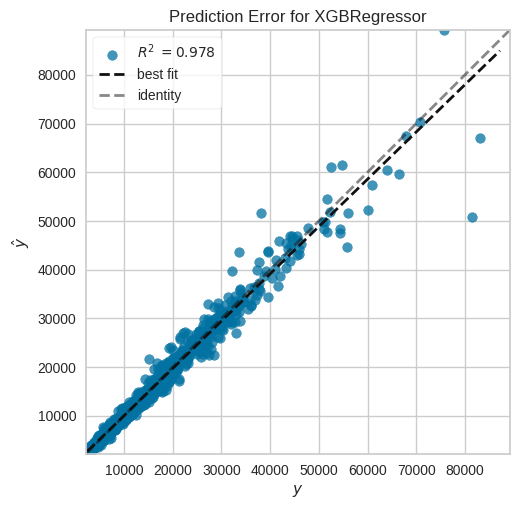

In [ ]:
#--------予測と実測値の比較------------------
plot_model(tuned_best, plot = 'error')

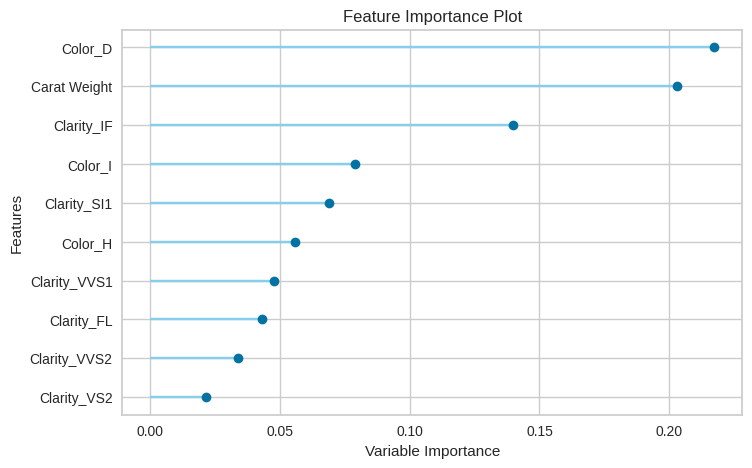

In [ ]:
#-----重要な入力パラメータのランキング---------

plot_model(tuned_best, plot='feature')

In [ ]:
#---------学習していないデータの予測---------------------
unseen_predictions = predict_model(tuned_best, data=data_unseen)
unseen_predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,715.1702,1792469.0233,1338.8312,0.9826,0.0720,0.0540


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,prediction_label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,11616.031250
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,10685.954102
2,1.01,Good,E,SI1,G,G,GIA,5161,4999.608398
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,35007.199219
4,1.01,Good,I,SI1,VG,VG,GIA,4238,4144.597656
...,...,...,...,...,...,...,...,...,...
595,1.02,Very Good,F,SI1,G,G,GIA,5430,5057.188477
596,2.05,Good,G,VS1,G,VG,GIA,26297,27184.402344
597,2.01,Very Good,E,VS2,EX,VG,GIA,27002,27915.902344
598,1.03,Ideal,D,SI1,EX,EX,GIA,6250,6287.567871


---
---